In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
import math

from scipy.stats import multivariate_normal
from sklearn.datasets import load_iris
%matplotlib inline

# загружаем данные
data = load_iris()

In [79]:
# оценим (a1, a2, a3, Sigma1, Sigma2, Sigma3)
sigma = ([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], 
         [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], 
         [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])

# характеристики вектора
char = []

index = 0
for j in range(3):
    char.append(np.array([data.data[i] for i in range (150) if data.target[i] == j]))

char = np.array(char)

# вектор матожиданий
mean_ = np.array([char[0].mean(axis=0), char[1].mean(axis=0), char[2].mean(axis=0)])

print "Вектор матожиданий для каждой компоненты:"
print mean_

# заполнение матрицы ковариаций
for k in range(3):
    for i in range(4):
        for j in range(4):
            
            sigma[k][i][j] = np.array(char[k].T[i] * char[k].T[j]).mean() - char[k].T[i].mean()*char[k].T[j].mean()
 

for k in range(3):
    print
    print "Матрица ковариаций для компоненты ", k 
    for i in range(4):
        print sigma[0][i]


Вектор матожиданий для каждой компоненты:
[[ 5.006  3.418  1.464  0.244]
 [ 5.936  2.77   4.26   1.326]
 [ 6.588  2.974  5.552  2.026]]

Матрица ковариаций для компоненты  0
[0.12176399999999532, 0.098291999999997159, 0.015815999999999164, 0.010335999999999901]
[0.098291999999997159, 0.14227599999999896, 0.011448000000000569, 0.011207999999999885]
[0.015815999999999164, 0.011448000000000569, 0.029504000000000197, 0.0055840000000000889]
[0.010335999999999901, 0.011207999999999885, 0.0055840000000000889, 0.011264000000000017]

Матрица ковариаций для компоненты  1
[0.12176399999999532, 0.098291999999997159, 0.015815999999999164, 0.010335999999999901]
[0.098291999999997159, 0.14227599999999896, 0.011448000000000569, 0.011207999999999885]
[0.015815999999999164, 0.011448000000000569, 0.029504000000000197, 0.0055840000000000889]
[0.010335999999999901, 0.011207999999999885, 0.0055840000000000889, 0.011264000000000017]

Матрица ковариаций для компоненты  2
[0.12176399999999532, 0.09829199999999

### Вычислим полтности для каждой пары и каждой компоненты смеси, и нарисуем графики

In [92]:
from scipy.stats import multivariate_normal

grid = np.mgrid[-3:10:0.1, -3:10:0.1]

def calculate_pdf(x, y):
    
        # плотность случайной величины
        rand_var_denc = []
    
        for k in range(3):

            # создаем случайные величины с матожиданием и матрицей ковариаций как у компонент вектора
            # и сразу же считаем плотность
            rand_var_denc = np.array([[sps.multivariate_normal.pdf(((grid[1, i, j], grid[0, i, j])), 
                                                                        mean=[mean_[k][x], mean_[k][y]], 
                                                                        cov=[[sigma[k][x][x], sigma[k][x][y]], 
                                                                             [sigma[k][y][x], sigma[k][y][y]]])
                                            for i in range(grid[0].shape[0])]
                                           for j in range(grid[0].shape[1])])

            # рисуем график (линии уровня)
            plt.figure(figsize=(30, 10))

            plt.subplot(1, 2, 2)
            plt.title('Iris ' + str(k) + '; pair (' + str(x) + ', '+ str(y) + ')', fontsize=(30))
            CS = plt.contour(grid[0], grid[1], rand_var_denc , [0.005, 0.02, 0.05, 0.085])  
            plt.clabel(CS, fontsize=10, inline=1, fmt='%1.3f')
            plt.xlim((np.min(grid[0]), np.max(grid[0])))
            plt.ylim((np.min(grid[1]), np.max(grid[1])))
            
            # наносим точки выборки
            plt.scatter(char[k].T[x], char[k].T[y], alpha=0.2, s=40) 

            plt.show()

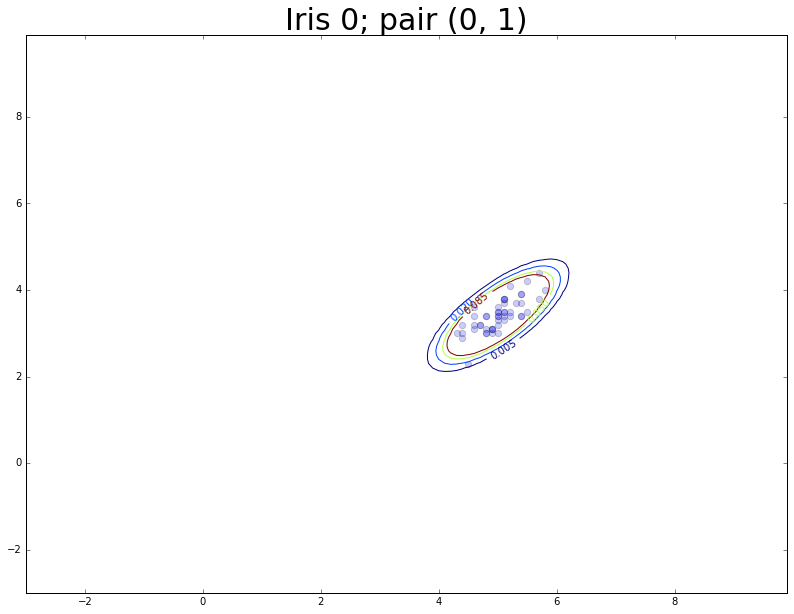

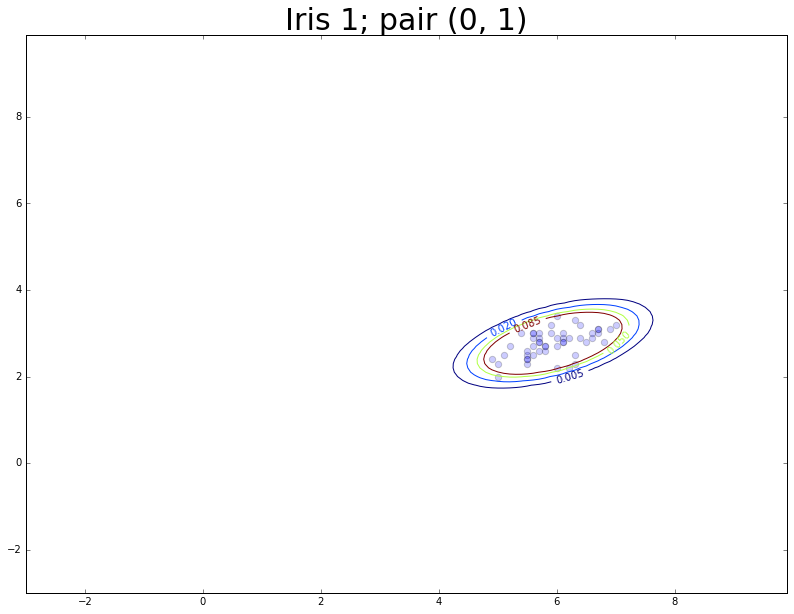

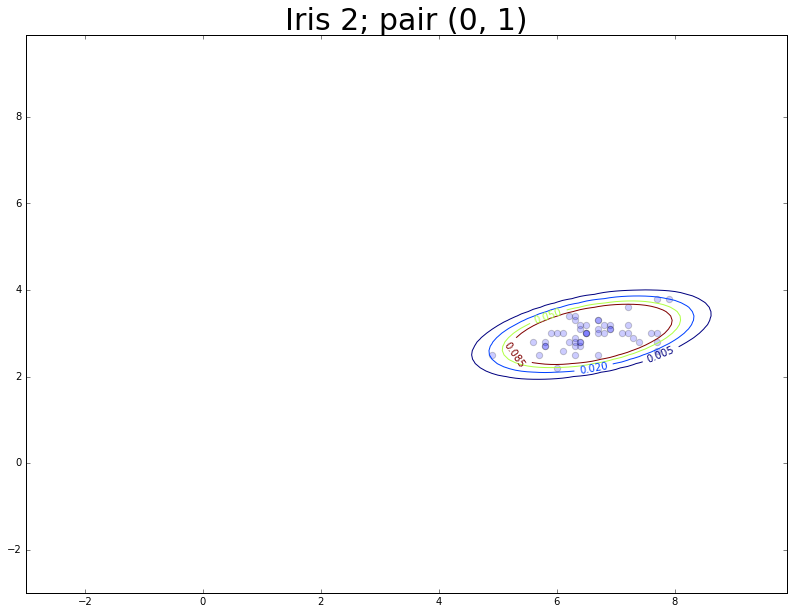

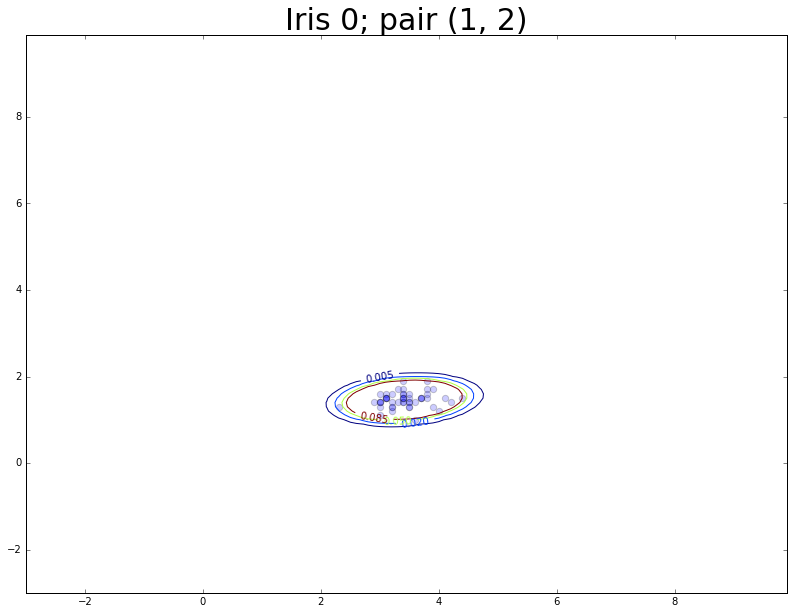

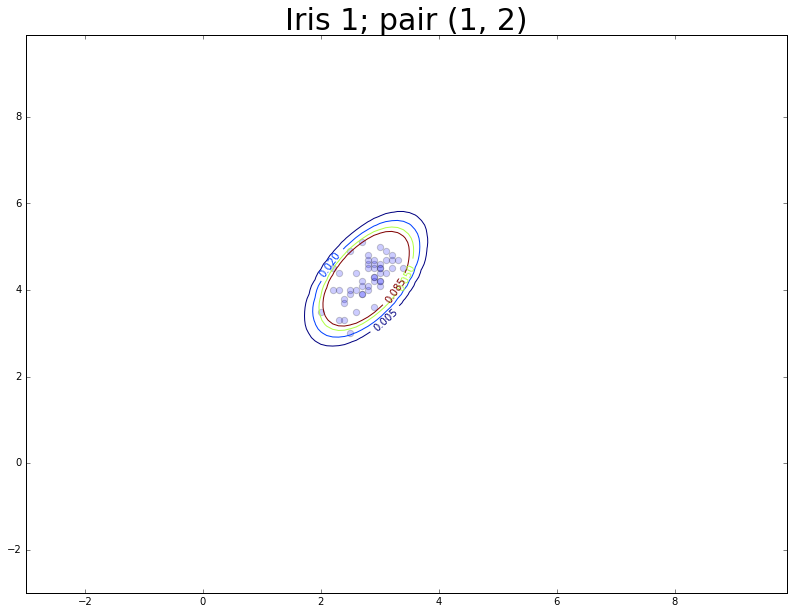

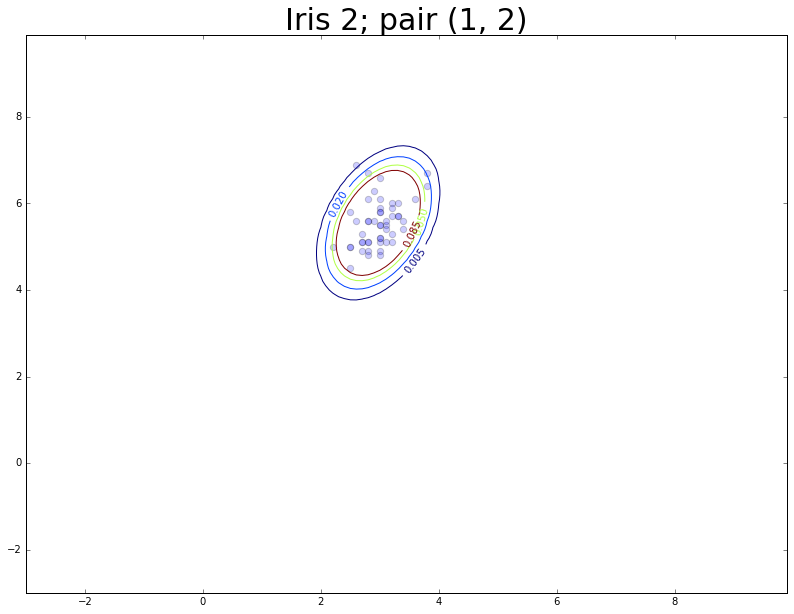

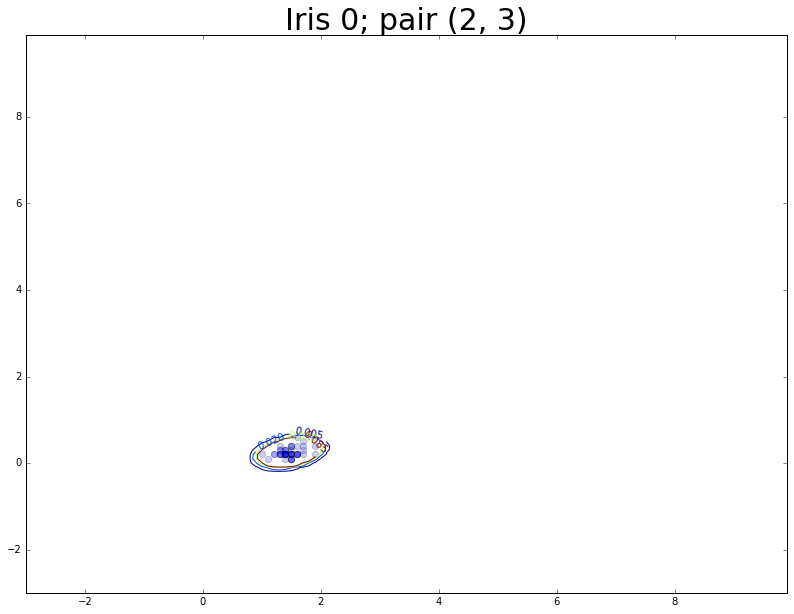

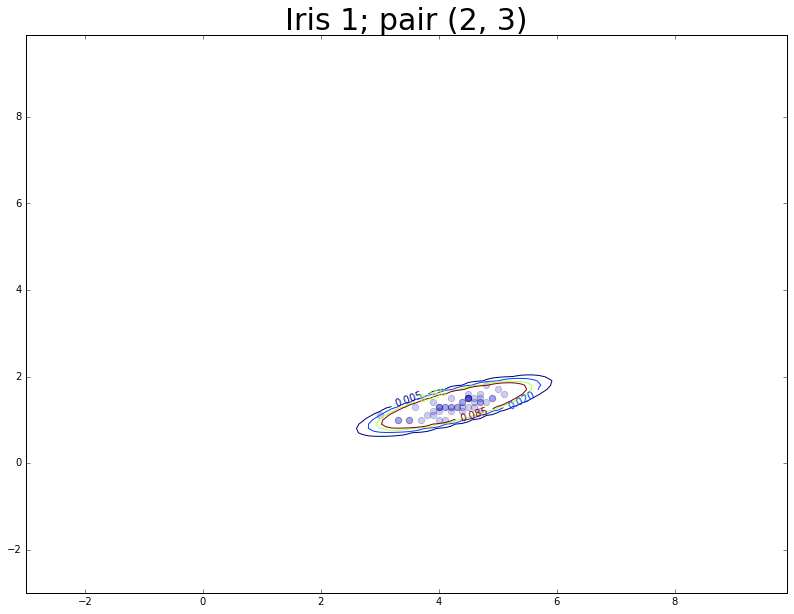

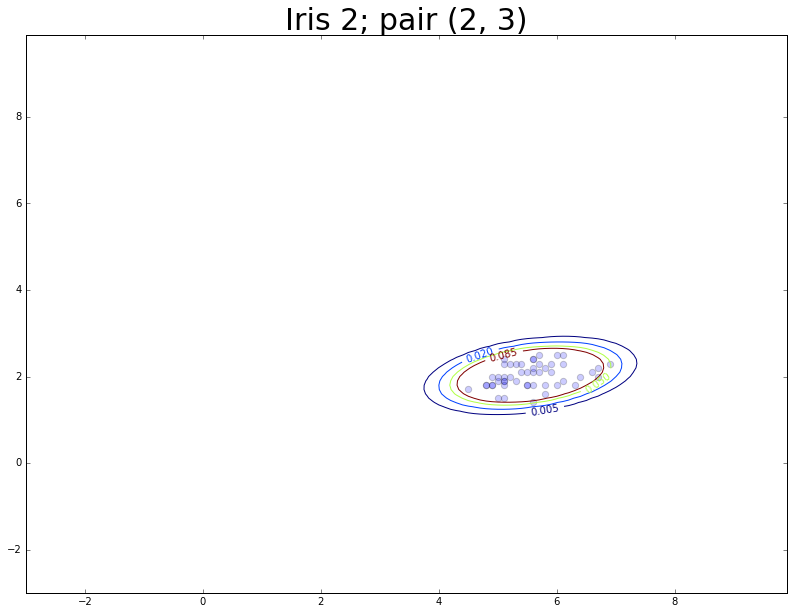

In [93]:
calculate_pdf(0, 1)
calculate_pdf(1, 2)
calculate_pdf(2, 3)

In [83]:
# оценим вероятность P(T = k)
prob = []

for k in range(3):
    prob.append(char[k].size*1.0 / char.size)
    
print prob

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


### Все типы ирисов равновероятны
### Вычислим условное матожидание
### Пользуемся формулой для рассчета условного матожидания дискретной случайной величины

In [ ]:
cond_exp = np.array()